<a href="https://colab.research.google.com/github/dhanush2405-code/dhanush2405-code/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Generating synthetic dataset
np.random.seed(42)
num_samples = 500

data = {
    'pH': np.random.uniform(6.0, 9.0, num_samples),
    'Dissolved Oxygen': np.random.uniform(3.0, 10.0, num_samples),
    'BOD': np.random.uniform(1.0, 8.0, num_samples),
    'Nitrates': np.random.uniform(0.1, 50.0, num_samples),
    'Turbidity': np.random.uniform(0.1, 10.0, num_samples),
}

# Define target variable (1 = Safe, 0 = Unsafe)
data['Quality'] = [
    1 if (6.5 <= pH <= 8.5 and do >= 5 and bod <= 3 and nitrates < 40 and turb < 5) else 0
    for pH, do, bod, nitrates, turb in zip(data['pH'], data['Dissolved Oxygen'], data['BOD'], data['Nitrates'], data['Turbidity'])
]

# Create DataFrame
df = pd.DataFrame(data)

# Save dataset to CSV
df.to_csv('water_quality_dataset.csv', index=False)
print("Dataset saved as 'water_quality_dataset.csv'")

# Preview dataset
print(df.head())

Dataset saved as 'water_quality_dataset.csv'
         pH  Dissolved Oxygen       BOD   Nitrates  Turbidity  Quality
0  7.123620          7.887132  2.295931  26.002181   2.690886        1
1  8.852143          6.752675  4.793307  24.011176   2.545090        0
2  8.195982          5.166693  7.110621   1.379539   9.071920        0
3  7.795975          8.696565  6.125574  17.128267   2.570507        0
4  6.468056          7.793118  6.645928  19.071761   2.792302        0


In [ ]:
df = pd.read_csv('water_quality_dataset.csv')
print(df.head())

         pH  Dissolved Oxygen       BOD   Nitrates  Turbidity  Quality
0  7.123620          7.887132  2.295931  26.002181   2.690886        1
1  8.852143          6.752675  4.793307  24.011176   2.545090        0
2  8.195982          5.166693  7.110621   1.379539   9.071920        0
3  7.795975          8.696565  6.125574  17.128267   2.570507        0
4  6.468056          7.793118  6.645928  19.071761   2.792302        0


Loaded dataset from water_quality_dataset.csv
Dataset Preview:
         pH  Dissolved Oxygen       BOD   Nitrates  Turbidity  Quality
0  7.123620          7.887132  2.295931  26.002181   2.690886        1
1  8.852143          6.752675  4.793307  24.011176   2.545090        0
2  8.195982          5.166693  7.110621   1.379539   9.071920        0
3  7.795975          8.696565  6.125574  17.128267   2.570507        0
4  6.468056          7.793118  6.645928  19.071761   2.792302        0
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       1.00      0.43      0.60         7

    accuracy                           0.96       100
   macro avg       0.98      0.71      0.79       100
weighted avg       0.96      0.96      0.95       100



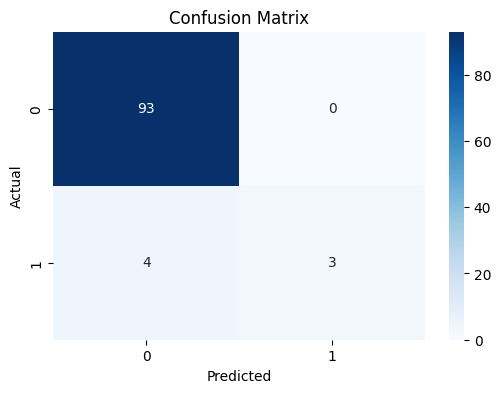

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Check if dataset exists, otherwise generate synthetic data
file_path = 'water_quality_dataset.csv'
if not os.path.exists(file_path):
    print("Dataset not found. Generating synthetic dataset...")
    np.random.seed(42)
    num_samples = 500
    data = {
        'pH': np.random.uniform(6.0, 9.0, num_samples),
        'Dissolved Oxygen': np.random.uniform(3.0, 10.0, num_samples),
        'BOD': np.random.uniform(1.0, 8.0, num_samples),
        'Nitrates': np.random.uniform(0.1, 50.0, num_samples),
        'Turbidity': np.random.uniform(0.1, 10.0, num_samples),
    }
    data['Quality'] = [
        1 if (6.5 <= pH <= 8.5 and do >= 5 and bod <= 3 and nitrates < 40 and turb < 5) else 0
        for pH, do, bod, nitrates, turb in zip(data['pH'], data['Dissolved Oxygen'], data['BOD'], data['Nitrates'], data['Turbidity'])
    ]
    df = pd.DataFrame(data)
    df.to_csv(file_path, index=False)
    print(f"Synthetic dataset saved as {file_path}")
else:
    df = pd.read_csv(file_path)
    print(f"Loaded dataset from {file_path}")

# Display first few rows of dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
df = df.dropna()

# Assume the last column is the target variable
target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Support Vector Machine model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()